# Introducing Pandas

Pandas is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

It's one of three libraries you'll encounter repeatedly in the field of data science:

## Pandas
Introduces "Data Frames" and "Series" that allow you to slice and dice rows and columns of information.

## NumPy
Usually you'll encounter "NumPy arrays", which are multi-dimensional array objects. It is easy to create a Pandas DataFrame from a NumPy array, and Pandas DataFrames can be cast as NumPy arrays. NumPy arrays are mainly important because of...

## Scikit_Learn
The machine learning library we'll use throughout this course is scikit_learn, or sklearn, and it generally takes NumPy arrays as its input.

So, a typical thing to do is to load, clean, and manipulate your input data using Pandas. Then convert your Pandas DataFrame into a NumPy array as it's being passed into some Scikit_Learn function. That conversion can often happen automatically.

Let's start by loading some comma-separated value data using Pandas into a DataFrame:


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("../datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


You can also view the end of your data with tail():

In [3]:
df.tail(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [4]:
df.shape

(768, 9)

The total size of the data frame is the rows * columns:

In [5]:
df.size

6912

The len() function gives you the number of rows in a DataFrame:

In [6]:
len(df)

768

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [7]:
df.columns

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [8]:
df['Glucose']

0      148
1       85
2      183
3       89
4      137
5      116
6       78
7      115
8      197
9      125
10     110
11     168
12     139
13     189
14     166
15     100
16     118
17     107
18     103
19     115
20     126
21      99
22     196
23     119
24     143
25     125
26     147
27      97
28     145
29     117
      ... 
738     99
739    102
740    120
741    102
742    109
743    140
744    153
745    100
746    147
747     81
748    187
749    162
750    136
751    121
752    108
753    181
754    154
755    128
756    137
757    123
758    106
759    190
760     88
761    170
762     89
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

You can also extract a given range of rows from a named column, like so:

In [9]:
df['Glucose'][:5]

0    148
1     85
2    183
3     89
4    137
Name: Glucose, dtype: int64

Or even extract a single value from a specified column / row combination:

In [10]:
df['Glucose'][5]

116

To extract more than one column, you pass in an array of column names instead of a single one:

In [11]:
df[['BMI', 'Glucose']]

,BMI,Glucose
0,33.6,148
1,26.6,85
2,23.3,183
3,28.1,89
4,43.1,137
5,25.6,116
6,31.0,78
7,35.3,115
8,30.5,197
9,0.0,125


You can also extract specific ranges of rows from more than one column, in the way you'd expect:

In [12]:
df[['Glucose', 'BMI']][:5]

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1


Sorting your DataFrame by a specific column looks like this:

In [13]:
df.sort_values(['Glucose'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
502,6,0,68,41,0,39.0,0.727,41,1
349,5,0,80,32,0,41.0,0.346,37,1
342,1,0,68,35,0,32.0,0.389,22,0
182,1,0,74,20,23,27.7,0.299,21,0
62,5,44,62,0,0,25.0,0.587,36,0
680,2,56,56,28,45,24.2,0.332,22,0
537,0,57,60,0,0,21.7,0.735,67,0
146,9,57,80,37,0,32.8,0.096,41,0
352,3,61,82,28,0,34.4,0.243,46,0


You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [14]:
degree_counts = df['Glucose'].value_counts()
degree_counts.head()

100    17
99     17
129    14
125    14
111    14
Name: Glucose, dtype: int64

Pandas even makes it easy to plot a Series or DataFrame - just call plot():

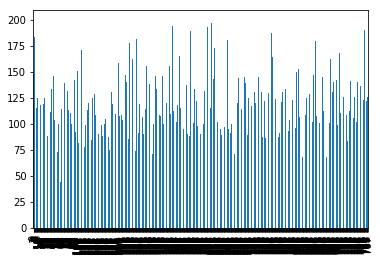

In [15]:
df['Glucose'].plot(kind='bar')

Plotted Graph looks very Crowded. We will take a small subset of the data frame to generate a graph

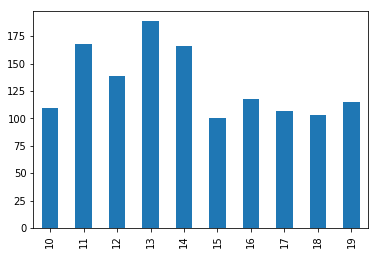

In [16]:
df['Glucose'][10:20].plot(kind='bar')

This does not help us understand the data at all. So intsead we will plot a Histogram.  
Histogram represents the frequency of a variable over an interval. The data can be represented for discrete values or in intervals called bins.

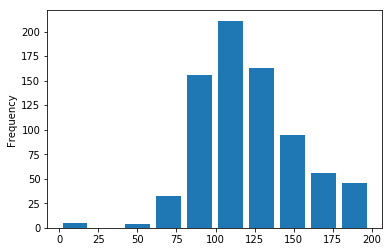

In [17]:
df['Glucose'].plot(kind='hist', bins=10, rwidth=0.8)

 There are many more ways we can visualize our datasets like line plot, scatter plot, stacked bar plot, Histogram, etc.  

Using Visualization libraries like matplotlib, ggplot, bokeh, and seaborn, we can customize the representation of the graphs and charts. 

We will look more into visualization techniques in future lessons